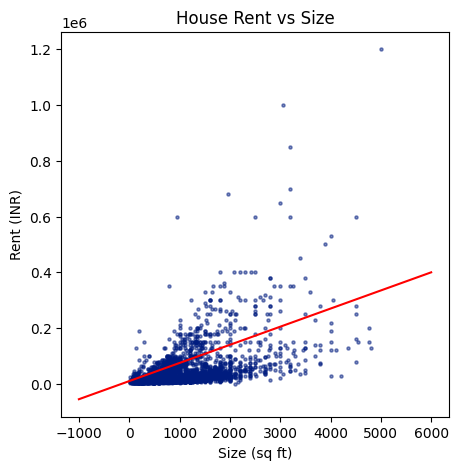

In [4]:
#%matplotlib ipympl
import kagglehub
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
from kagglehub import KaggleDatasetAdapter

file = "House_Rent_Dataset.csv"

df = kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS, "iamsouravbanerjee/house-rent-prediction-dataset", file)
cropped_df = df[["Rent", "Size"]].query('Rent <= 2000000 and Size <= 5000')

m = 65
b = 0.01 * np.pow(10, 6)
x_line = np.linspace(-1000, 6000)
y_line = m * x_line + b

# Plotting the data
#print(plt.style.available)
plt.style.use('seaborn-v0_8-dark-palette')
plt.figure(figsize=(5, 5))
plt.scatter(cropped_df["Size"], cropped_df["Rent"], alpha=0.5, s=5)
plt.title("House Rent vs Size")
plt.xlabel("Size (sq ft)")
plt.ylabel("Rent (INR)")
plt.plot(x_line, y_line, color='red', label='y = mx + b')
plt.show()

In [2]:
def get_cost_function(rent, size, W: NDArray[np.float64], B: NDArray[np.float64]) -> tuple[NDArray[np.float64], NDArray[np.float64], NDArray[np.float64]]:
    
    J_vals = np.zeros_like(W)

    count = rent.size
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            w = W[i, j]
            b = B[i, j]
            pred = w * size + b
            J_vals[i, j] = (1/(2*count)) * np.sum((pred - rent) ** 2)
    
    return W, B, J_vals

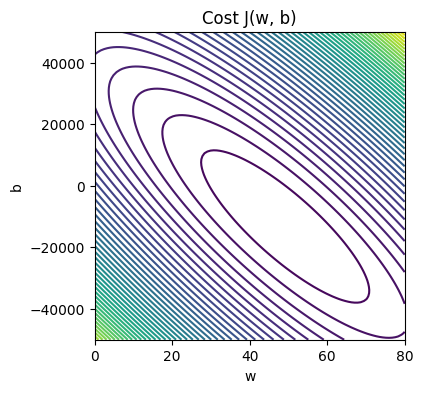

In [3]:
rent = cropped_df["Rent"].values
size = cropped_df["Size"].values

w_vals = np.linspace(0, 80, 100)
b_vals = np.linspace(-50000, 50000, 100)
W, B = np.meshgrid(w_vals, b_vals)
        
fig = plt.figure(figsize=(4, 4))
plt.contour(*get_cost_function(rent, size, W, B), levels=50, cmap='viridis')
plt.xlabel('w')
plt.ylabel('b')
plt.title('Cost J(w, b)')
plt.show()